# Especialització de DataScience de la IT ACADEMY
### *Sprint6: Tasca dades, probabilitats i estadístiques*
### Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

#### Alumne: Jorge Prieto Rey

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

###  La Liga Segunda Division  (2021/2022) (football) 
https://www.football-data.co.uk/spainm.php

Key to results data (https://www.football-data.co.uk/notes.txt):

In [207]:
# Resultados de la liga 
df = pd.read_csv('SP2.csv')
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,SP2,13/08/2021,19:00,Huesca,Eibar,2,0,H,1,0,...,1.52,-0.25,1.95,1.90,1.97,1.93,1.99,1.97,1.93,1.91
1,SP2,13/08/2021,21:00,Zaragoza,Ibiza,0,0,D,0,0,...,1.42,-0.25,1.90,1.95,1.93,1.98,2.02,2.00,1.93,1.91
2,SP2,14/08/2021,16:00,Sociedad B,Leganes,1,0,H,0,0,...,1.45,0.25,1.83,2.02,1.85,2.07,1.87,2.12,1.82,2.03
3,SP2,14/08/2021,18:30,Girona,Amorebieta,2,0,H,0,0,...,1.51,-0.50,1.83,2.02,1.88,2.04,1.88,2.08,1.82,2.01
4,SP2,14/08/2021,21:00,Ponferradina,Alcorcon,1,0,H,0,0,...,1.35,-0.25,2.10,1.77,2.12,1.81,2.17,1.81,2.11,1.76


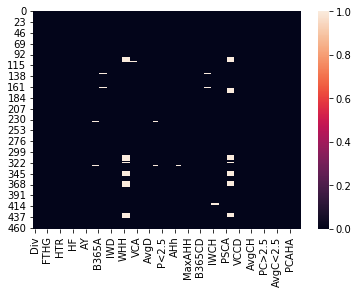

In [208]:
#Visualizar columnas con valores nulos
sns.heatmap(df.isnull())

In [209]:
df.describe().round(4)

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,462.0000,462.0000,462.0000,462.0000,462.0000,462.0000,462.0000,462.0000,462.0000,462.0000,...,462.0000,462.0000,462.0000,462.0000,462.0000,462.0000,462.0000,462.0000,462.0000,462.0000
mean,1.3961,1.0325,0.6277,0.4351,13.0065,10.7294,4.5065,3.4978,13.2381,13.6645,...,1.6334,-0.2938,1.9108,1.9424,1.9439,1.9700,1.9923,2.0156,1.9112,1.9301
std,1.1546,0.9573,0.7765,0.6378,4.2403,4.1728,2.2575,2.0711,4.1296,3.8948,...,0.2071,0.3960,0.1086,0.1093,0.1116,0.1135,0.1067,0.1153,0.1012,0.1030
min,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,0.0000,0.0000,2.0000,5.0000,...,1.2700,-1.5000,1.5800,1.7000,1.6100,1.7100,1.8000,1.7700,1.6000,1.7100
25%,1.0000,0.0000,0.0000,0.0000,10.0000,8.0000,3.0000,2.0000,11.0000,11.0000,...,1.5000,-0.5000,1.8300,1.8500,1.8500,1.8800,1.9000,1.9200,1.8300,1.8400
50%,1.0000,1.0000,0.0000,0.0000,13.0000,10.0000,4.0000,3.0000,13.0000,14.0000,...,1.5900,-0.2500,1.9000,1.9500,1.9400,1.9600,1.9900,2.0100,1.9100,1.9250
75%,2.0000,2.0000,1.0000,1.0000,15.0000,13.0000,6.0000,5.0000,16.0000,16.0000,...,1.7100,0.0000,2.0000,2.0200,2.0300,2.0600,2.0800,2.1100,1.9975,2.0100
max,6.0000,5.0000,3.0000,3.0000,29.0000,29.0000,12.0000,12.0000,29.0000,31.0000,...,2.7200,1.0000,2.2000,2.3500,2.2500,2.4600,2.2500,2.4800,2.1800,2.3600


In [210]:
dfset=df.iloc[:, 0:23] # Columnas con datos del juego
dfset

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,SP2,13/08/2021,19:00,Huesca,Eibar,2,0,H,1,0,...,3,5,10,16,4,3,1,1,0,0
1,SP2,13/08/2021,21:00,Zaragoza,Ibiza,0,0,D,0,0,...,0,2,11,16,1,6,2,2,0,0
2,SP2,14/08/2021,16:00,Sociedad B,Leganes,1,0,H,0,0,...,4,3,11,17,4,1,2,2,0,0
3,SP2,14/08/2021,18:30,Girona,Amorebieta,2,0,H,0,0,...,3,2,18,14,4,1,3,2,0,0
4,SP2,14/08/2021,21:00,Ponferradina,Alcorcon,1,0,H,0,0,...,2,3,13,11,3,7,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,SP2,29/05/2022,19:00,Leganes,Almeria,2,2,D,2,1,...,3,6,12,17,2,9,5,2,0,0
458,SP2,29/05/2022,19:00,Oviedo,Ibiza,3,2,H,1,0,...,10,6,9,16,2,6,0,4,0,0
459,SP2,29/05/2022,19:00,Sp Gijon,Las Palmas,0,1,A,0,1,...,1,4,19,11,1,6,2,0,0,0
460,SP2,29/05/2022,19:00,Tenerife,Cartagena,1,2,A,0,2,...,6,5,17,16,4,1,5,1,0,0


In [211]:
#Seleccionamos las columnas con valores númericos unicamente
dfset=dfset.select_dtypes(np.number)
dfset.head()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2,0,1,0,5,11,3,5,10,16,4,3,1,1,0,0
1,0,0,0,0,11,10,0,2,11,16,1,6,2,2,0,0
2,1,0,0,0,9,10,4,3,11,17,4,1,2,2,0,0
3,2,0,0,0,10,13,3,2,18,14,4,1,3,2,0,0
4,1,0,0,0,6,10,2,3,13,11,3,7,2,2,0,1


In [212]:
#HS = Home Team Shots; AS = Away Team Shots; HF = Home Team Fouls Committed; AF = Away Team Fouls Committed
dfset=dfset.loc[:,['HS','AS','HF','AF']]
dfset.head()

,HS,AS,HF,AF
0,5,11,10,16
1,11,10,11,16
2,9,10,11,17
3,10,13,18,14
4,6,10,13,11


In [213]:
dfset.describe().round(4)

,HS,AS,HF,AF
count,462.0000,462.0000,462.0000,462.0000
mean,13.0065,10.7294,13.2381,13.6645
std,4.2403,4.1728,4.1296,3.8948
min,2.0000,2.0000,2.0000,5.0000
25%,10.0000,8.0000,11.0000,11.0000
50%,13.0000,10.0000,13.0000,14.0000
75%,15.0000,13.0000,16.0000,16.0000
max,29.0000,29.0000,29.0000,31.0000


In [214]:
#Calcula la moda de cada columna
stats.mode(dfset)

ModeResult(mode=array([[11, 10, 11, 11]], dtype=int64), count=array([[50, 54, 52, 47]]))

In [215]:
#Calcula la mediana
np.median(dfset,0)

array([13., 10., 13., 14.])

In [216]:
#Desviación estándar
np.std(dfset)

HS    4.235743
AS    4.168315
HF    4.125155
AF    3.890547
dtype: float64

In [217]:
#Media aritmética
np.mean(dfset)

HS    13.006494
AS    10.729437
HF    13.238095
AF    13.664502
dtype: float64

## Exercici 2
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

In [218]:
#Correlación Equipo visitante(tiros a puerta - Corners)
np.corrcoef(dfset['AS'],df['AC'])

array([[1.        , 0.44574857],
       [0.44574857, 1.        ]])

In [219]:
#Correlación tiros a puerta Local VS Visitante
np.corrcoef(dfset['HS'],dfset['AS'])

array([[ 1.        , -0.32219918],
       [-0.32219918,  1.        ]])

## Exercici 3
Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

In [220]:
ListaCorr = []
for n in dfset:
    for m in dfset:
        corr=np.corrcoef(dfset[n],df[m]) 
        ListaCorr.append(corr[0,1])

In [221]:
corr=np.array(ListaCorr)
corr=array.reshape(4,4)
corr

array([[ 1.        , -0.32219918, -0.205847  , -0.01497262],
       [-0.32219918,  1.        , -0.02218488, -0.03616225],
       [-0.205847  , -0.02218488,  1.        ,  0.02466789],
       [-0.01497262, -0.03616225,  0.02466789,  1.        ]])

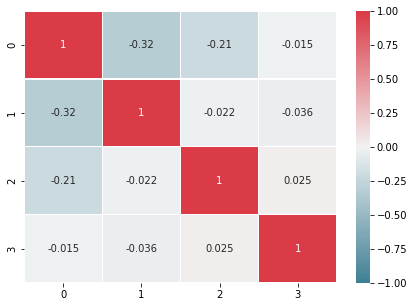

In [222]:
plt.figure(figsize = (7, 5))
sns.heatmap(corr, linewidths = 0.2,
            cmap = sns.diverging_palette(220, 10, as_cmap=True),
            vmin = -1, vmax = 1, annot = True)
plt.show()

## Exercici 4
Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

In [223]:
#Media geómetrica
stats.gmean(dfset)

array([12.28836172,  9.92536938, 12.54755924, 13.1057672 ])

In [224]:
#Media geómetrica con Numpy
def g_mean(x):
    a = np.log(x)
    return np.exp(a.mean())

In [225]:
g_mean(dfset)

HS    12.288362
AS     9.925369
HF    12.547559
AF    13.105767
dtype: float64

In [226]:
#Media harmónica
stats.hmean(dfset)

array([11.4674434 ,  9.06966575, 11.67093418, 12.52844037])